In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [5]:
!ls -lat ..

total 496
drwxrwxrwx 1 ldhagen ldhagen   4096 Jun 27 15:51  .
-rw------- 1 ldhagen ldhagen  13365 Jun 27 15:51  nohup.out
-rwxrwxrwx 1 ldhagen ldhagen  22924 Jun 27 15:50 'Texas COVID-19 Hospitalizations by TSA.xlsx'
-rwxrwxrwx 1 ldhagen ldhagen 112814 Jun 27 15:50 'Cumulative Tests over Time by County.xlsx'
-rwxrwxrwx 1 ldhagen ldhagen  94168 Jun 27 15:50 'Texas COVID-19 Active Case Data by County.xlsx'
-rwxrwxrwx 1 ldhagen ldhagen 106546 Jun 27 15:50 'Texas COVID-19 Fatality Count Data by County.xlsx'
-rwxrwxrwx 1 ldhagen ldhagen 127400 Jun 27 15:50 'Texas COVID-19 Case Count Data by County.xlsx'
drwxrwxrwx 1 ldhagen ldhagen   4096 Jun 27 15:48  Texas_Covid_Data_Notebook
-rwxrwxrwx 1 ldhagen ldhagen  13576 Jun 26 19:45  CoVID-19_Dashboard_Data.csv
drwxrwxrwx 1 ldhagen ldhagen   4096 Jun 26 17:26  Robinhood_Review
drwxrwxrwx 1 ldhagen ldhagen   4096 Jun 25 16:46  Prison_Notebook
drwxrwxrwx 1 ldhagen ldhagen   4096 Jun 23 19:22  .ipynb_checkpoints
drwxrwxrwx 1 ldhagen ldhagen   4096 Ju

In [6]:
df_Texas_Covid_case = pd.read_excel("../Texas COVID-19 Case Count Data by County.xlsx",header=2)

In [7]:
a = df_Texas_Covid_case.set_index('County Name')

In [8]:
b = a.T.Total[a.columns[1:]]

In [9]:
b

Cases\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\n\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\n03-04         0
Cases\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\n\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\n03-05         0
Cases\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\n\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\n03-06         5
Cases\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\n\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\n03-09        12
Cases\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\n\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\n03-10        15
                                                                                       ...  
Cases 06-23                                                                           120370
Cases 06-24                                                                           125921
Cases 06-25                                                                           131917
Cases 06-26                                                                           137624
Cases 06-27                                                           

In [10]:
dated_dict = {}
count = 0
for x in b:
    month_temp = int(b.index[count][-5:].split('-')[0])
    day_temp = int(b.index[count][-5:].split('-')[1])
    dated_dict[datetime.datetime(2020, month_temp, day_temp)] = b[count]
    count += 1

In [11]:
dated_df = pd.DataFrame(dated_dict.items(), columns=['Date', 'Total Cases'])

In [12]:
c = dated_df.set_index('Date')

In [13]:
c

,Total Cases
Date,
2020-03-04,0.0
2020-03-05,0.0
2020-03-06,5.0
2020-03-09,12.0
2020-03-10,15.0
...,...
2020-06-23,120370.0
2020-06-24,125921.0
2020-06-25,131917.0


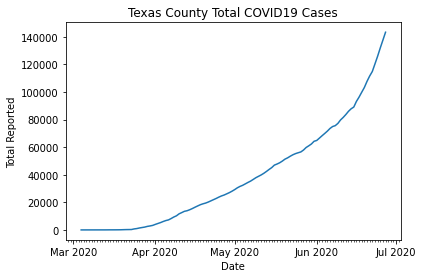

In [14]:
import datetime
import matplotlib.dates as mdates
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.xaxis.set_minor_locator(days)
plt.xlabel('Date',color='black')
plt.ylabel('Total Reported',color='black')
plt.plot(c)
plt.title('Texas County Total COVID19 Cases')
plt.savefig('TexasTotal.png')

In [15]:
c

,Total Cases
Date,
2020-03-04,0.0
2020-03-05,0.0
2020-03-06,5.0
2020-03-09,12.0
2020-03-10,15.0
...,...
2020-06-23,120370.0
2020-06-24,125921.0
2020-06-25,131917.0


In [16]:
x = c.diff(periods = 1)

In [17]:
x_7day_moving= x.rolling(7).mean().shift()

In [18]:
x.rename(columns={'Total Cases':'New Cases'}, inplace=True)

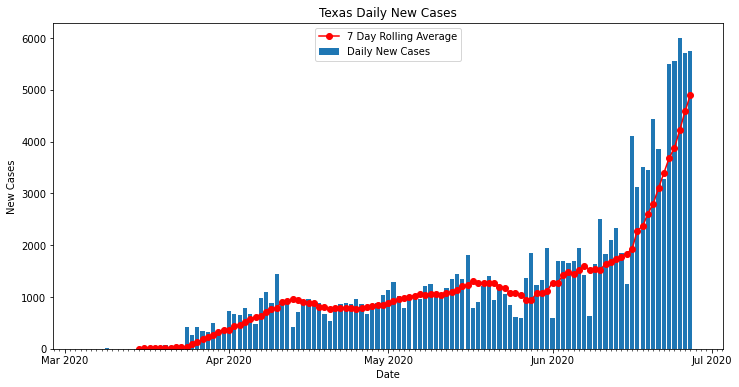

In [19]:
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(12,6)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.xaxis.set_minor_locator(days)
plt.xlabel('Date',color='black')
plt.ylabel('New Cases',color='black')
plt.title('Texas Daily New Cases')
plt.bar(x.index,x['New Cases'])
plt.plot(x_7day_moving,'ro-')
plt.legend(['7 Day Rolling Average','Daily New Cases'])
fig.savefig('TexasNewCasesDaily.png')

In [20]:
x

,New Cases
Date,
2020-03-04,NaN
2020-03-05,0.0
2020-03-06,5.0
2020-03-09,7.0
2020-03-10,3.0
...,...
2020-06-23,5489.0
2020-06-24,5551.0
2020-06-25,5996.0
